In [26]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

In [27]:
Categories=['Dhoni','Virat']
input_list=[] #input
output_list=[] #output

In [28]:
datadir="Dataset"

In [29]:
for i in Categories:
    
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        input_list.append(img_resized.flatten())
        output_list.append(Categories.index(i))
    print(f'loaded category:{i} successfully')

loading... category : Dhoni
loaded category:Dhoni successfully
loading... category : Virat
loaded category:Virat successfully


In [30]:
input_array=np.array(input_list) #converting image into array
target=np.array(output_list)
df=pd.DataFrame(input_array) #dataframe creation using pandas
df['Target']=target
x=df.iloc[:,:-1] #input 
y=df.iloc[:,-1] #output

In [31]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid)

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Test Train Split Successful')
model.fit(x_train,y_train)
print('Training completed')

Splitted Successfully
The Model is trained well with the given images


In [34]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The predicted Data is :
[1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1]
The actual data is:
[1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1]
The model is 96.66666666666667% accurate


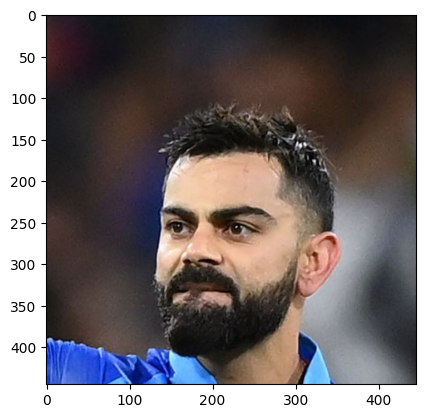

In [123]:
url="\v2.jpg"
img=imread(url)
plt.imshow(img)
plt.show()

In [124]:
import cv2
face_cascade=cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
eye_cascade=cv2.CascadeClassifier("haarcascade_eye.xml")

In [125]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)


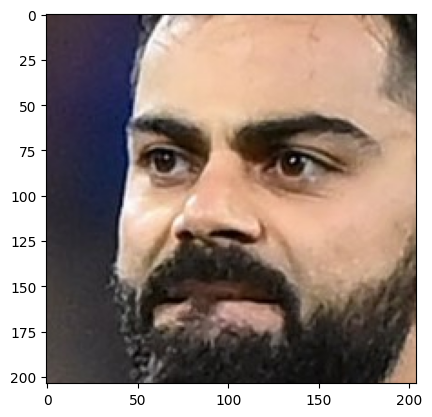

In [126]:
plt.imshow(roi_color)
plt.show()

In [127]:
img_resize=resize(roi_color,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])

Dhoni = 0.0001537708099279033%
Virat = 99.99984622919007%
The predicted image is : Virat


In [149]:
cap = cv2.VideoCapture(0)
  
# loop runs if capturing has been initialized.
while 1: 
  
    # reads frames from a camera
    ret, img = cap.read() 
  
    # convert to gray scale of each frames
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
    # Detects faces of different sizes in the input image
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
  
    for (x,y,w,h) in faces:
        # To draw a rectangle in a face 
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2) 
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
  
  
    # Display an image in a window
    cv2.imshow('img',img)
    neededface=roi_color
    cv2.imwrite("DetectedFace.jpg",roi_color)
  
  
    # Wait for Esc key to stop
    k = cv2.waitKey(10)
    if k == 27:
        cap.release()
        cv2.destroyAllWindows() 
        break

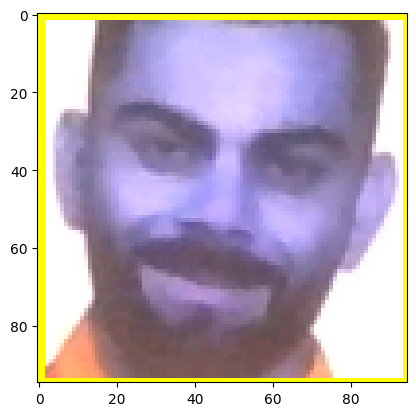

In [150]:
plt.imshow(neededface)
plt.show()

In [151]:
img_resize=resize(roi_color,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])

Dhoni = 3.6867213488510986%
Virat = 96.31327865114889%
The predicted image is : Virat
